In [1]:
from THM_main import Version5_THM_prototype
from iapws import IAPWS97
import numpy as np
from THM_main import plotting
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import cProfile
# Begining of the script used to test the THM prototype class.

In [2]:
case_name = "MPHYS AT10"
#User choice:
solveConduction = True
plot_at_z1 = []

########## Thermal hydraulics parameters ##########
## Geometric parameters
#User choice:
solveConduction = True
zPlotting = []

If = 8
I1 = 3
# Sensitivity to the meshing parameters
Iz1 = 75 # number of control volumes in the axial direction, added 70 for comparison with GeN-Foam
# Iz1 = 10, 20, 40, 50, 70, 80 and 160 are supported for the DONJON solution


########## Choice of Thermalhydraulics correlation ##########
voidFractionCorrel = 'EPRIvoidCorrel' # 'modBestion', 'HEM1', 'GEramp', 'EPRIvoidModel'
frfaccorel = "Churchill" # 'base', 'blasius', 'Churchill', 'Churchill_notOK' ?
P2Pcorel = "lockhartMartinelli" # 'base', 'HEM1', 'HEM2', 'MNmodel', "lockhartMartinelli"
numericalMethod = "FVM" # "FVM": Solves the system using matrix inversion with preconditioning.
                        # "GaussSiedel" : Applies the Gauss-Seidel iterative solver.
                        # "BiCG" : Uses the BiConjugate Gradient method for solving non-symmetric or indefinite matrices.
                        # "BiCGStab" : Applies the BiCGStab (BiConjugate Gradient Stabilized) method to ensure faster and more stable convergence.

########## Thermal hydraulics parameters ##########
## Geometric parameters
canalType = "square" # "square", "cylindrical"
pitch =1.295e-2 #1.295e-2 # m : ATRIUM10 pincell pitch   0.0126 #
fuelRadius = 0.4435e-2 # m : fuel rod radius
#gapRadius = fuelRadius + 0.000001 # m : expansion gap radius : "void" between fuel and clad - equivalent to inner clad radius
gapRadius = 0.4520e-2 # m : expansion gap radius : "void" between fuel and clad - equivalent to inner clad radius
cladRadius = 0.5140e-2 # m : clad external radius
height = 1.655 # m : height : 3.8 m : active core height in BWRX-300 SMR, 1.555 m : for GeNFoam comparison.


## Fluid parameters
# T_inlet, T_outlet = 270, 287 Celcius
#tInlet = 270 + 273.15 # K, for BWRX-300 SMR core, try lowering the inlet temperature to set boiling point back and reduce the void fraction increase in the first few cm
tInlet = 270 + 273.15 # K, for BWRX-300 SMR core
#Nominal operating pressure = 7.2 MPa (abs)
pOutlet =  7.2e6 # Pa 
# Nominal coolant flow rate = 1530 kg/s
massFlowRate = 8.407 * 10**(-2) #1530  / (200*91)  # kg/s

## Material parameters
kFuel = 4.18 # W/m.K, TECHNICAL REPORTS SERIES No. 59 : Thermal Conductivity of Uranium Dioxide, IAEA, VIENNA, 1966
Hgap = 10000 
#Hgap = 9000
kClad = 21.5 # W/m.K, Thermal Conductivity of Zircaloy-2 (as used in BWRX-300) according to https://www.matweb.com/search/datasheet.aspx?MatGUID=eb1dad5ce1ad4a1f9e92f86d5b44740d
# k_Zircaloy-4 = 21.6 W/m.K too so check for ATRIUM-10 clad material but should have the same thermal conductivity

############ Nuclear Parameters ###########
# Number of fuel rods and assemblies for a small modular Boiling Water Reactor core

def main():

    qFiss = 200000000
    qFiss_init_0 = [0,0,0,0,0]
    for i in range(Iz1-5):
        qFiss_init_0.append(qFiss)
    
    case2 = Version5_THM_prototype("Initialization of BWR Pincell equivalent canal", canalType, pitch, fuelRadius, gapRadius, cladRadius, 
                            height, tInlet, pOutlet, massFlowRate, qFiss_init_0, kFuel, Hgap, kClad, Iz1, If, I1, zPlotting, 
                            solveConduction, dt = 0, t_tot = 0, frfaccorel = frfaccorel, P2Pcorel = P2Pcorel, voidFractionCorrel = 'EPRIvoidModel',
                            numericalMethod = numericalMethod)
    
    #print(f"Case 4 uInlet = {case4.convection_sol.uInlet}")
    caseMerge = [case2, ]#, case1, case2, case3, case4, case5, case6, case7, case8]
    return caseMerge

caseMerge = main()
if __name__ == "__main__":
    cProfile.run('main()', filename='profiling_result.prof')


$$$---------- THM: prototype, case treated : Initialization of BWR Pincell equivalent canal.
$$$---------- THM: prototype, steady state case.
$$---------- Calling DFM class.
Setting up heat convection solution along the axial dimension. zmax = 1.655 m with 75 axial elements.
self.I_z: 75
self.qFlow: 0.08407
self.pOutlet: 7200000.0
self.Lf: 1.655
self.r_f: 0.004435
self.clad_r: 0.00514
self.r_w: 0.01295
self.Dz: 0.02206666666666667
self.dt: 0
Courant number: 0.0
Numerical Method FVM
Velocity at the inlet:  1.2884090506886694
Dh: 0.010490958633360763
Hydraulic diameter: [0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.0104

c:\Users\cleme\OneDrive\Documents\Poly\BWR\THM_prototype\THM_waterProp.py:561: RuntimeWarning: divide by zero encountered in scalar divide
  return self.U[i] - (self.voidFractionTEMP[i] / ( 1 - self.voidFractionTEMP[i])) * (self.rhogTEMP[i] / self.rhoTEMP[i]) * self.VgjPrimeTEMP[i]
c:\Users\cleme\OneDrive\Documents\Poly\BWR\THM_prototype\THM_waterProp.py:576: RuntimeWarning: invalid value encountered in sqrt
  return 1 + 1/np.sqrt(X) + 20/X


Convergence test, residuals: epsilon: 1.9281961487509798, rho: 3.1175361732342615, xTh: 8.481289198763843
uInlet:1.2891115505816395
uInlet:1.2891097435189207
Convergence test, residuals: epsilon: 0.05848182607767855, rho: 0.09927199543111945, xTh: 0.000506123044932286
uInlet:1.2891097435189207
uInlet:1.28910111504963
Convergence test, residuals: epsilon: 0.004693677578993844, rho: 0.005215176738002852, xTh: 0.0005268873529714897
uInlet:1.28910111504963
uInlet:1.2891007015714724
Convergence test, residuals: epsilon: 0.00015895545669836317, rho: 0.000283061842045702, xTh: 5.0637522738894986e-05
uInlet:1.2891007015714724
Convergence reached at iteration number: 3
Pressure: [7218683.82272079, 7218581.866475195, 7218479.9100674745, 7218377.953497641, 7218275.996765709, 7218174.039871685, 7218072.082815584, 7217970.125597419, 7217868.168217196, 7217766.2106749285, 7217664.252970627, 7217562.295104301, 7217460.3370759655, 7217358.378885632, 7217256.420533309, 7217154.462019008, 7217052.503342

In [3]:

class GFPlotter():
    def __init__(self, caseList, directory_path, case_name, second_path = ""):
        self.case_name = f'{case_name}\\'

        self.caseList = caseList
        self.directory_path = directory_path
        self.height = self.caseList[0].convection_sol.height

        self.data_dict_list = []
        self.data_dict = self.read_files_in_directory()
        self.allow_space()

        self.struture_fraction = 1 - (self.alpha_liquid[0] + self.alpha_vapour[0])

        self.calculateFields()
        self.createZ()

    def plotCase(self):
        title = f"f: {self.caseList[0].convection_sol.frfaccorel}, \n Méthode numérique: {self.caseList[0].convection_sol.numericalMethod}, \n Correlation void fraction: {self.caseList[0].convection_sol.voidFractionCorrel}"
        labelTitle = 'THM_prototype'
        fig1, ax1 = plt.subplots()
        for i in range(len(self.caseList)):
            ax1.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.T_water, label=labelTitle)
        ax1.set_xlabel("Axial position in m")
        ax1.set_ylabel("Temperature in K")
        ax1.set_title(f"{title}")
        ax1.grid()
        ax1.legend(loc="best")
        fig1.savefig(rf'result\{self.case_name}\Tcoolant.png', bbox_inches='tight')

        fig2, ax2 = plt.subplots()
        for i in range(len(self.caseList)):
            ax2.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.voidFraction[-1], label=labelTitle)

        ax2.set_xlabel("Axial position in m")
        ax2.set_ylabel("Void fraction")
        ax2.set_title(f"{title}")
        ax2.grid()
        ax2.legend(loc="best")
        fig2.savefig(rf'result\{self.case_name}\epsilon.png', bbox_inches='tight')

        fig3, ax3 = plt.subplots()
        print(f"rho_mix GenFoam: {self.rho_mixture}")
        for i in range(len(self.caseList)):
            ax3.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rho[-1], label=labelTitle)

        ax3.set_xlabel("Axial position in m")
        ax3.set_ylabel("Density in kg/m^3")
        ax3.set_title(f"{title}")
        ax3.grid()
        ax3.legend(loc="best")
        fig3.savefig(rf'result\{self.case_name}\Rho.png', bbox_inches='tight')

        fig7, ax7 = plt.subplots()
        for i in range(len(self.caseList)):
            ax7.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoL[-1], label=labelTitle)
        ax7.set_xlabel("Axial position in m")
        ax7.set_ylabel("Liquid density in kg/m^3")
        ax7.set_title(f"{title}")
        ax7.grid()
        ax7.legend(loc="best")
        fig7.savefig(rf'result\{self.case_name}\RhoL.png', bbox_inches='tight')

        fig8, ax8 = plt.subplots()
        for i in range(len(self.caseList)):
            ax8.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoG[-1], label=labelTitle)
        ax8.set_xlabel("Axial position in m")
        ax8.set_ylabel("Vapour density in kg/m^3")
        ax8.set_title(f"{title}")
        ax8.grid()
        ax8.legend(loc="best")
        fig8.savefig(rf'result\{self.case_name}\RhoG.png', bbox_inches='tight')

        fig4, ax4 = plt.subplots() 
        for i in range(len(self.caseList)):
            labelTitle = f"THM_prototype {self.caseList[i].convection_sol.frfaccorel}"
            ax4.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.P[-1], label=labelTitle)
        ax4.step(self.zList, self.p_rgh, label="GenFoam P_rgh")
        ax4.set_xlabel("Axial position in m")
        ax4.set_ylabel("Pressure in Pa")
        ax4.grid()
        ax4.set_title(f"{title}")
        ax4.legend(loc="best")
        fig4.savefig(rf'result\{self.case_name}\P.png', bbox_inches='tight')

        fig5, ax5 = plt.subplots()
        for i in range(len(self.caseList)):
            ax5.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ul, label=labelTitle)
        ax5.set_xlabel("Axial position in m")
        ax5.set_ylabel("Liquid Velocity in m/s")
        ax5.set_title(f"{title}")
        ax5.grid()
        ax5.legend(loc="best")
        fig5.savefig(rf'result\{self.case_name}\Ul.png', bbox_inches='tight')

        fig6, ax6 = plt.subplots()
        for i in range(len(self.caseList)):
            ax6.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ug, label=labelTitle)
        ax6.set_xlabel("Axial position in m")
        ax6.set_ylabel("Vapour Velocity in m/s")
        ax6.set_title(f"{title}")
        ax6.grid()
        ax6.legend(loc="best")
        fig6.savefig(rf'result\{self.case_name}\Ug.png', bbox_inches='tight')

        fig9, ax9 = plt.subplots()
        for i in range(len(self.caseList)):
            ax9.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.U[-1], label=labelTitle)
        ax9.set_xlabel("Axial position in m")
        ax9.set_ylabel("Mixture Velocity in m/s")
        ax9.set_title(f"{title}")
        ax9.grid()
        ax9.legend(loc="best")
        fig9.savefig(rf'result\{self.case_name}\U.png', bbox_inches='tight')

        fig10, ax10 = plt.subplots()
        for i in range(len(self.caseList)):
            ax10.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Rel, label=labelTitle)
        ax10.set_xlabel("Axial position in m")
        ax10.set_ylabel("Reynolds number")
        ax10.set_title(f"{title}")
        ax10.grid()
        ax10.legend(loc="best")
        fig10.savefig(rf'result\{self.case_name}\Re.png', bbox_inches='tight')

        fig11, ax11 = plt.subplots()
        ax11.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.xTh[-1], label=labelTitle)
        ax11.set_xlabel("Axial position in m")
        ax11.set_ylabel("xTh")
        ax11.set_title(f"{title}")
        ax11.grid()
        ax11.legend(loc="best")
        fig11.savefig(rf'result\{self.case_name}\xTh.png', bbox_inches='tight')

        
        """ fig12, ax12 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_liquid = [self.caseList[i].convection_sol.Ul[j] * self.caseList[i].convection_sol.rhoL[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ul))]
            ax12.step(self.caseList[i].convection_sol.z_mesh, rhoUA_liquid, label=labelTitle + " rhoUA_liquid")
        #ax12.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax12.set_xlabel("Axial position in m")
        ax12.set_ylabel("rhoUA_liquid")
        ax12.set_title(f"{title}")
        ax12.grid()
        fig12.savefig(rf'result\{self.case_name}\rhoUA_liquid.png', bbox_inches='tight')

        fig13, ax13 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_vapour = [self.caseList[i].convection_sol.Ug[j] * self.caseList[i].convection_sol.rhoG[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax13.step(self.caseList[i].convection_sol.z_mesh, rhoUA_vapour, label=labelTitle + " rhoUA_vapour")
        #ax13.step(self.zList, self.alphaRhoMagU_vapour, label="GenFoam")
        ax13.set_xlabel("Axial position in m")
        ax13.set_ylabel("rhoUA_vapour")
        ax13.set_title(f"{title}")
        ax13.grid()
        fig13.savefig(rf'result\{self.case_name}\rhoUA_vapour.png', bbox_inches='tight')

        fig14, ax14 = plt.subplots()
        for i in range(len(self.caseList)):
            self.rhoUA = [self.caseList[i].convection_sol.U[-1][j] * self.caseList[i].convection_sol.rho[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax14.step(self.caseList[i].convection_sol.z_mesh, self.rhoUA, label=labelTitle + " rhoUA")
        #ax14.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax14.set_xlabel("Axial position in m")
        ax14.set_ylabel("rhoUA")
        ax14.set_title(f"{title}")
        ax14.grid()
        fig14.savefig(rf'result\{self.case_name}\rhoUA.png', bbox_inches='tight') """
        

        plt.show()

    def createZ(self):
        self.zList = np.linspace(0, self.height, len(self.alpha_liquid))

    def read_files_in_directory(self):
        data_dict = {}
        print(f"Reading files in directory: {self.directory_path}")
        # Parcourt tous les fichiers du dossier
        for filename in os.listdir(self.directory_path):
            file_path = os.path.join(self.directory_path, filename)
            print(f"Reading file: {file_path}")
            # Vérifie que c'est bien un fichier
            if os.path.isfile(file_path):

                with open(file_path, 'r') as file:
                    content = file.read()
                    
                    # Trouve la première parenthèse ouvrante et fermante
                    start = content.find('(')
                    end = content.find(')', start)
                    #end = start + 74
                    if start != -1 and end != -1:
                        # Extrait les données entre les parenthèses
                        data_str = content[start+1:end].strip()
                        # Divise les lignes en liste de chaînes
                        data_lines = data_str.splitlines()
                        if len(data_lines) != 1:
                            float_list = [float(item) for item in data_lines]
                            data_dict[filename] = float_list

                    if len(data_lines) == 1:
                        # Trouve la première parenthèse ouvrante et fermante
                        start = content.find('(')
                        end = content.find(';', start)
                        #end = start
                        if start != -1 and end != -1:
                            # Extrait les données entre les parenthèses
                            data_str = content[start+1:end].strip()
                            # Divise les lignes en liste de chaînes
                            data_lines = data_str.splitlines()
                            data_lines.pop()
                            x, y, z = np.zeros(len(data_lines)), np.zeros(len(data_lines)), np.zeros(len(data_lines))
                            for i in range(len(data_lines)):
                                a = values = data_lines[i].strip("()").split()
                                x[i] = float(a[0])
                                y[i] = float(a[1])
                                z[i] = float(a[2])
                            data_dict[fr'{filename}_x'] = x
                            data_dict[fr'{filename}_y'] = y
                            data_dict[fr'{filename}_z'] = z
        
        return data_dict
    
    def allow_space(self):
        self.alpha_liquid = np.array(self.data_dict['alpha.liquid'])
        self.alpha_vapour = np.array(self.data_dict['alpha.vapour'])
        #self.alpha_powerModel = np.array(self.data_dict['alpha.powerModel'])
        self.alphaPhi_liquid = np.array(self.data_dict['alphaPhi.liquid']+ [self.data_dict['alphaPhi.liquid'][-1]])
        self.alphaPhi_vapour = np.array(self.data_dict['alphaPhi.vapour']+ [self.data_dict['alphaPhi.vapour'][-1]])
        self.alphaRhoMagU_liquid = np.array(self.data_dict['alphaRhoMagU.liquid'])#+ [self.data_dict['alphaRhoMagU.liquid'][-1]])
        self.alphaRhoMagU_vapour = np.array(self.data_dict['alphaRhoMagU.vapour'])#+ [self.data_dict['alphaRhoMagU.vapour'][-1]])
        self.alphaRhoPhi_liquid = np.array(self.data_dict['alphaRhoPhi.liquid']+ [self.data_dict['alphaRhoPhi.liquid'][-1]])
        self.alphaRhoPhi_vapour = np.array(self.data_dict['alphaRhoPhi.vapour']+ [self.data_dict['alphaRhoPhi.vapour'][-1]])
        self.areaDensity_interface = np.array(self.data_dict['areaDensity.interface'])
        self.dgdt_liquid = np.array(self.data_dict['dgdt.liquid'])
        self.dgdt_vapour = np.array(self.data_dict['dgdt.vapour'])
        self.dmdt_vapour = np.array(self.data_dict['dmdt.liquid.vapour'])
        self.heatFlux_structure = np.array(self.data_dict['heatFlux.structure'])
        self.htc_liquid_interface = np.array(self.data_dict['htc.liquid.interface'])
        self.htc_liquid_structure = np.array(self.data_dict['htc.liquid.structure'])
        self.p = np.array(self.data_dict['p'])
        self.p_rgh = np.array(self.data_dict['p_rgh'])
        self.Re_liquid_structure = np.array(self.data_dict['Re.liquid.structure'])
        #self.Re_vapour_structure = np.array(self.data_dict['Re.vapour.structure'])
        self.Re_liquid_vapour = np.array(self.data_dict['Re.liquid.vapour'])
        self.T_fixedPower = np.array(self.data_dict['T.fixedPower'])
        self.T_liquid = np.array(self.data_dict['T.liquid'])
        self.T_vapour = np.array(self.data_dict['T.vapour'])
        self.U_liquid_x = np.array(self.data_dict['U.liquid_x'])
        self.U_liquid_y = np.array(self.data_dict['U.liquid_y'])
        self.U_liquid_z = np.array(self.data_dict['U.liquid_z'])
        self.U_vapour_x = np.array(self.data_dict['U.vapour_x'])
        self.U_vapour_y = np.array(self.data_dict['U.vapour_y'])
        self.U_vapour_z = np.array(self.data_dict['U.vapour_z'])

    def calculateFields(self):
        self.alpha_vapour = self.alpha_vapour/(1-self.struture_fraction)
        self.alpha_liquid = self.alpha_liquid/(1-self.struture_fraction)
        self.U_liquid = np.sqrt(self.U_liquid_x**2 + self.U_liquid_y**2 + self.U_liquid_z**2)
        self.U_vapour = np.sqrt(self.U_vapour_x**2 + self.U_vapour_y**2 + self.U_vapour_z**2)
        self.U_mixture = (1-self.alpha_vapour) * self.U_liquid + self.alpha_vapour * self.U_vapour

        self.rho_liquid  = self.alphaRhoPhi_liquid/(self.alphaPhi_liquid)
        self.rho_vapour = self.alphaRhoPhi_vapour/(self.alphaPhi_vapour)
        for i in range(len(self.rho_vapour)):
            if np.isnan(self.rho_vapour[i]):
                self.rho_vapour[i] = 0
            if np.isnan(self.rho_liquid[i]):
                self.rho_liquid[i] = 0
        print(f"rho_liquid GeN-Foam: {self.rho_liquid}")
        print(f"rho_vapour GeN-Foam: {self.rho_vapour}")
        self.rho_mixture = self.rho_liquid + self.rho_vapour

        self.T_mixture = (1-self.alpha_vapour) * self.T_liquid + self.alpha_vapour * self.T_vapour

    def plotComparison(self):
        file_path = rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\result\{self.case_name}'
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        if len(self.caseList) == 1:
            labelTitle = 'THM_prototype'
        labelTitle = 'THM_prototype'
        title = ""#f"f: {self.caseList[0].convection_sol.frfaccorel}, \n Méthode numérique: {self.caseList[0].convection_sol.numericalMethod}, \n Correlation void fraction: {self.caseList[0].convection_sol.voidFractionCorrel}"
        
        fig0, ax0 = plt.subplots()
        for i in range(len(self.caseList)):
            ax0.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.xTh[-1], label=labelTitle)
        ax0.set_xlabel("Axial position in m")
        ax0.set_ylabel("Quality")
        ax0.set_title(f"{title}")
        ax0.grid()
        ax0.legend(loc="best")
        fig0.savefig(rf'result\{self.case_name}\xTh.png', bbox_inches='tight')

        fig1, ax1 = plt.subplots()
        for i in range(len(self.caseList)):
            ax1.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.T_water, label=labelTitle)
        #ax1.step(self.zList, self.T_liquid, label="GenFoam T.liquid")
        #ax1.step(self.zList, self.T_vapour, label="GenFoam T.vapour")
        ax1.step(self.zList, self.T_mixture, label="GenFoam")
        ax1.set_xlabel("Axial position in m")
        ax1.set_ylabel("Temperature in K")
        ax1.set_title(f"{title}")
        ax1.grid()
        ax1.legend(loc="best")
        fig1.savefig(rf'result\{self.case_name}\Tcoolant.png', bbox_inches='tight')

        fig2, ax2 = plt.subplots()
        for i in range(len(self.caseList)):
            ax2.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.voidFraction[-1], label=labelTitle)
        ax2.step(self.zList, self.alpha_vapour, label="GenFoam")
        ax2.set_xlabel("Axial position in m")
        ax2.set_ylabel("Void fraction")
        ax2.set_title(f"{title}")
        ax2.grid()
        ax2.legend(loc="best")
        fig2.savefig(rf'result\{self.case_name}\epsilon.png', bbox_inches='tight')

        fig3, ax3 = plt.subplots()
        print(f"rho_mix GeN-Foam: {self.rho_mixture}")
        for i in range(len(self.caseList)):
            ax3.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rho[-1], label=labelTitle)
        ax3.plot(self.zList, self.rho_mixture, label="GenFoam")
        ax3.set_xlabel("Axial position in m")
        ax3.set_ylabel("Density in kg/m^3")
        ax3.set_title(f"{title}")
        ax3.grid()
        ax3.legend(loc="best")
        fig3.savefig(rf'result\{self.case_name}\Rho.png', bbox_inches='tight')

        fig7, ax7 = plt.subplots()
        for i in range(len(self.caseList)):
            ax7.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoL[-1], label=labelTitle)
        ax7.plot(self.zList, self.rho_liquid, label="GenFoam")
        ax7.set_xlabel("Axial position in m")
        ax7.set_ylabel("Liquid density in kg/m^3")
        ax7.set_title(f"{title}")
        ax7.grid()
        ax7.legend(loc="best")
        fig7.savefig(rf'result\{self.case_name}\RhoL.png', bbox_inches='tight')

        fig8, ax8 = plt.subplots()
        for i in range(len(self.caseList)):
            ax8.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoG[-1], label=labelTitle)
        ax8.plot(self.zList, self.rho_vapour, label="GenFoam")
        ax8.set_xlabel("Axial position in m")
        ax8.set_ylabel("Vapour density in kg/m^3")
        ax8.set_title(f"{title}")
        ax8.grid()
        ax8.legend(loc="best")
        fig8.savefig(rf'result\{self.case_name}\RhoG.png', bbox_inches='tight')

        fig4, ax4 = plt.subplots() 
        for i in range(len(self.caseList)):
            labelTitle = f"THM_prototype {self.caseList[i].convection_sol.frfaccorel} {self.caseList[i].convection_sol.P2Pcorel}"
            ax4.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.P[-1], label=labelTitle)
        ax4.step(self.zList, self.p, label="GenFoam")
        ax4.step(self.zList, self.p_rgh, label="GenFoam P_rgh")
        ax4.set_xlabel("Axial position in m")
        ax4.set_ylabel("Pressure in Pa")
        ax4.grid()
        ax4.set_title(f"{title}")
        ax4.legend(loc="best")
        fig4.savefig(rf'result\{self.case_name}\P.png', bbox_inches='tight')

        fig5, ax5 = plt.subplots()
        for i in range(len(self.caseList)):
            ax5.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ul, label=labelTitle)
        ax5.step(self.zList, self.U_liquid, label="GenFoam")
        ax5.set_xlabel("Axial position in m")
        ax5.set_ylabel("Liquid Velocity in m/s")
        ax5.set_title(f"{title}")
        ax5.grid()
        ax5.legend(loc="best")
        fig5.savefig(rf'result\{self.case_name}\Ul.png', bbox_inches='tight')

        fig6, ax6 = plt.subplots()
        for i in range(len(self.caseList)):
            ax6.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ug, label=labelTitle)
        ax6.step(self.zList, self.U_vapour, label="GenFoam")
        ax6.set_xlabel("Axial position in m")
        ax6.set_ylabel("Vapour Velocity in m/s")
        ax6.set_title(f"{title}")
        ax6.grid()
        ax6.legend(loc="best")
        fig6.savefig(rf'result\{self.case_name}\Ug.png', bbox_inches='tight')

        fig9, ax9 = plt.subplots()
        for i in range(len(self.caseList)):
            ax9.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.U[-1], label=labelTitle)
        ax9.step(self.zList, self.U_mixture, label="GenFoam")
        ax9.set_xlabel("Axial position in m")
        ax9.set_ylabel("Mixture Velocity in m/s")
        ax9.set_title(f"{title}")
        ax9.grid()
        ax9.legend(loc="best")
        fig9.savefig(rf'result\{self.case_name}\U.png', bbox_inches='tight')

        fig10, ax10 = plt.subplots()
        for i in range(len(self.caseList)):
            ax10.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Rel, label=labelTitle)
        ax10.step(self.zList, self.Re_liquid_structure, label="GenFoam")
        ax10.set_xlabel("Axial position in m")
        ax10.set_ylabel("Reynolds number")
        ax10.set_title(f"{title}")
        ax10.grid()
        ax10.legend(loc="best")
        fig10.savefig(rf'result\{self.case_name}\Re.png', bbox_inches='tight')

        fig11, ax11 = plt.subplots()
        ax11.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.xTh[-1], label=labelTitle)
        ax11.set_xlabel("Axial position in m")
        ax11.set_ylabel("xTh")
        ax11.set_title(f"{title}")
        ax11.grid()
        ax11.legend(loc="best")
        fig11.savefig(rf'result\{self.case_name}\xTh.png', bbox_inches='tight')

        
        """ fig12, ax12 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_liquid = [self.caseList[i].convection_sol.Ul[j] * self.caseList[i].convection_sol.rhoL[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ul))]
            ax12.step(self.caseList[i].convection_sol.z_mesh, rhoUA_liquid, label=labelTitle + " rhoUA_liquid")
        #ax12.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax12.set_xlabel("Axial position in m")
        ax12.set_ylabel("rhoUA_liquid")
        ax12.set_title(f"{title}")
        ax12.grid()
        fig12.savefig(rf'result\{self.case_name}\rhoUA_liquid.png', bbox_inches='tight')

        fig13, ax13 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_vapour = [self.caseList[i].convection_sol.Ug[j] * self.caseList[i].convection_sol.rhoG[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax13.step(self.caseList[i].convection_sol.z_mesh, rhoUA_vapour, label=labelTitle + " rhoUA_vapour")
        #ax13.step(self.zList, self.alphaRhoMagU_vapour, label="GenFoam")
        ax13.set_xlabel("Axial position in m")
        ax13.set_ylabel("rhoUA_vapour")
        ax13.set_title(f"{title}")
        ax13.grid()
        fig13.savefig(rf'result\{self.case_name}\rhoUA_vapour.png', bbox_inches='tight')

        fig14, ax14 = plt.subplots()
        for i in range(len(self.caseList)):
            self.rhoUA = [self.caseList[i].convection_sol.U[-1][j] * self.caseList[i].convection_sol.rho[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax14.step(self.caseList[i].convection_sol.z_mesh, self.rhoUA, label=labelTitle + " rhoUA")
        #ax14.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax14.set_xlabel("Axial position in m")
        ax14.set_ylabel("rhoUA")
        ax14.set_title(f"{title}")
        ax14.grid()
        fig14.savefig(rf'result\{self.case_name}\rhoUA.png', bbox_inches='tight') """
        

        plt.show()

    def computeErrors(self):
        self.error_T_abs = []
        self.error_T_rel = []
        self.error_p_abs = []
        self.error_p_rel = []
        self.error_rho_abs = []
        self.error_rho_rel = []
        self.error_U_abs = []
        self.error_U_rel = []
        self.error_Re_abs = []
        self.error_Re_rel = []
        self.error_eps_abs = []
        self.error_eps_rel = []

        for i in range(len(self.caseList)):
            self.error_T_abs.append((self.T_mixture - self.caseList[i].convection_sol.T_water))
            self.error_T_rel.append(100*self.error_T_abs[-1]/(self.T_mixture))
            self.error_p_abs.append((self.p - self.caseList[i].convection_sol.P[-1]))
            self.error_p_rel.append(100*self.error_p_abs[-1]/(self.p))
            self.error_rho_abs.append(self.rho_mixture - self.caseList[i].convection_sol.rho[-1])
            self.error_rho_rel.append(100*self.error_rho_abs[-1]/(self.rho_mixture))
            self.error_U_abs.append((self.U_mixture - self.caseList[i].convection_sol.U[-1]))
            self.error_U_rel.append(100*self.error_U_abs[-1]/(self.U_mixture))
            self.error_Re_abs.append((self.Re_liquid_structure - self.caseList[i].convection_sol.Rel))
            self.error_Re_rel.append(100*self.error_Re_abs[-1]/(self.Re_liquid_structure))
            self.error_eps_abs.append((self.alpha_vapour - self.caseList[i].convection_sol.voidFraction[-1]))
            self.error_eps_rel.append(self.error_eps_abs[-1]/(self.alpha_vapour))

            

    def plotErrorsPressure(self):
        fig, ax = plt.subplots()
        for i in range(len(self.caseList)):
            print(self.error_p_abs)
            ax.step(self.caseList[i].convection_sol.z_mesh, self.error_p_abs[i], label=f" {self.caseList[i].convection_sol.frfaccorel} , {self.caseList[i].convection_sol.P2Pcorel}")
        ax.set_xlabel("Axial position in m")
        ax.set_ylabel("Absolute error in Pa")
        ax.set_title("Absolute error in pressure")
        ax.grid()
        ax.legend(loc="best")
        fig.savefig(rf'result\{self.case_name}\error_p_abs.png', bbox_inches='tight')

        fig1, ax1 = plt.subplots()
        for i in range(len(self.caseList)):
            ax1.step(self.caseList[i].convection_sol.z_mesh, self.error_p_rel[i], label=f" {self.caseList[i].convection_sol.frfaccorel} , {self.caseList[i].convection_sol.P2Pcorel}")
        ax1.set_xlabel("Axial position in m")
        ax1.set_ylabel("Relative error in %")
        ax1.set_title("Relative error in pressure")
        ax1.grid()
        ax1.legend(loc="best")
        fig1.savefig(rf'result\{self.case_name}\error_p_rel.png', bbox_inches='tight')

        plt.show()

        for i in range(len(self.caseList)):
            print(f"Mean relative error in pressure: {np.mean(self.error_p_rel[i])}, max relative error in pressure {np.max(self.error_p_rel[i])} for {self.caseList[i].convection_sol.frfaccorel}, {self.caseList[i].convection_sol.P2Pcorel}")


In [4]:

class GFPlotterComp(): #caseList, pathList, case_name, legendList
    def __init__(self, caseList, pathList, case_name, legendList):
        self.case_name = f'{case_name}\\'

        self.caseList = caseList
        self.pathList = pathList
        #self.directory_path = directory_path
        self.height = self.caseList[0].convection_sol.height
        self.legendList = legendList

        self.data_dict_list = self.read_files_in_directory()
        self.allow_space()

        self.struture_fraction = 1 - (self.alpha_liquid[0][0] + self.alpha_vapour[0][0])

        self.calculateFields()

        self.createZ()

    def createZ(self):
        self.zList = np.linspace(0, self.height, len(self.alpha_liquid[0]))

    def read_files_in_directory(self):
        dataList = []
        for directory_path in self.pathList:
            data_dict = {}
            print(f"Reading files in directory: {directory_path}")
            # Parcourt tous les fichiers du dossier
            for filename in os.listdir(directory_path):
                file_path = os.path.join(directory_path, filename)
                print(f"Reading file: {file_path}")
                # Vérifie que c'est bien un fichier
                if os.path.isfile(file_path):

                    with open(file_path, 'r') as file:
                        content = file.read()
                        
                        # Trouve la première parenthèse ouvrante et fermante
                        start = content.find('(')
                        end = content.find(')', start)
                        #end = start + 74
                        if start != -1 and end != -1:
                            # Extrait les données entre les parenthèses
                            data_str = content[start+1:end].strip()
                            # Divise les lignes en liste de chaînes
                            data_lines = data_str.splitlines()
                            if len(data_lines) != 1:
                                float_list = [float(item) for item in data_lines]
                                data_dict[filename] = float_list

                        if len(data_lines) == 1:
                            # Trouve la première parenthèse ouvrante et fermante
                            start = content.find('(')
                            end = content.find(';', start)
                            #end = start
                            if start != -1 and end != -1:
                                # Extrait les données entre les parenthèses
                                data_str = content[start+1:end].strip()
                                # Divise les lignes en liste de chaînes
                                data_lines = data_str.splitlines()
                                data_lines.pop()
                                x, y, z = np.zeros(len(data_lines)), np.zeros(len(data_lines)), np.zeros(len(data_lines))
                                for i in range(len(data_lines)):
                                    a = values = data_lines[i].strip("()").split()
                                    x[i] = float(a[0])
                                    y[i] = float(a[1])
                                    z[i] = float(a[2])
                                data_dict[fr'{filename}_x'] = x
                                data_dict[fr'{filename}_y'] = y
                                data_dict[fr'{filename}_z'] = z
            dataList.append(data_dict)
            
        return dataList
    
    def allow_space(self):
        self.alpha_liquid = [np.array(self.data_dict_list[i]['alpha.liquid']) for i in range(len(self.data_dict_list))]
        self.alpha_vapour = [np.array(self.data_dict_list[i]['alpha.vapour']) for i in range(len(self.data_dict_list))]
        #self.alpha_powerModel = np.array(self.data_dict['alpha.powerModel'])
        self.alphaPhi_liquid = [np.array(self.data_dict_list[i]['alphaPhi.liquid']+ [self.data_dict_list[i]['alphaPhi.liquid'][-1]]) for i in range(len(self.data_dict_list))]
        self.alphaPhi_vapour = [np.array(self.data_dict_list[i]['alphaPhi.vapour']+ [self.data_dict_list[i]['alphaPhi.vapour'][-1]]) for i in range(len(self.data_dict_list))]
        self.alphaRhoMagU_liquid = [np.array(self.data_dict_list[i]['alphaRhoMagU.liquid']) for i in range(len(self.data_dict_list))]
        self.alphaRhoMagU_vapour = [np.array(self.data_dict_list[i]['alphaRhoMagU.vapour']) for i in range(len(self.data_dict_list))]
        self.alphaRhoPhi_liquid = [np.array(self.data_dict_list[i]['alphaRhoPhi.liquid']+ [self.data_dict_list[i]['alphaRhoPhi.liquid'][-1]]) for i in range(len(self.data_dict_list))]
        self.alphaRhoPhi_vapour = [np.array(self.data_dict_list[i]['alphaRhoPhi.vapour']+ [self.data_dict_list[i]['alphaRhoPhi.vapour'][-1]]) for i in range(len(self.data_dict_list))]
        self.areaDensity_interface = [np.array(self.data_dict_list[i]['areaDensity.interface']) for i in range(len(self.data_dict_list))]
        self.dgdt_liquid = [np.array(self.data_dict_list[i]['dgdt.liquid']) for i in range(len(self.data_dict_list))]   
        self.dgdt_vapour = [np.array(self.data_dict_list[i]['dgdt.vapour']) for i in range(len(self.data_dict_list))]
        self.dmdt_vapour = [np.array(self.data_dict_list[i]['dmdt.liquid.vapour']) for i in range(len(self.data_dict_list))]
        self.heatFlux_structure = [np.array(self.data_dict_list[i]['heatFlux.structure']) for i in range(len(self.data_dict_list))]
        self.htc_liquid_interface = [np.array(self.data_dict_list[i]['htc.liquid.interface']) for i in range(len(self.data_dict_list))]
        self.htc_liquid_structure = [np.array(self.data_dict_list[i]['htc.liquid.structure']) for i in range(len(self.data_dict_list))]
        self.p = [np.array(self.data_dict_list[i]['p']) for i in range(len(self.data_dict_list))]
        self.p_rgh = [np.array(self.data_dict_list[i]['p_rgh']) for i in range(len(self.data_dict_list))]
        self.Re_liquid_structure = [np.array(self.data_dict_list[i]['Re.liquid.structure']) for i in range(len(self.data_dict_list))]
        #self.Re_vapour_structure = np.array(self.data_dict['Re.vapour.structure'])
        self.Re_liquid_vapour = [np.array(self.data_dict_list[i]['Re.liquid.vapour']) for i in range(len(self.data_dict_list))]
        self.T_fixedPower = [np.array(self.data_dict_list[i]['T.fixedPower']) for i in range(len(self.data_dict_list))]
        self.T_liquid = [np.array(self.data_dict_list[i]['T.liquid']) for i in range(len(self.data_dict_list))]
        self.T_vapour = [np.array(self.data_dict_list[i]['T.vapour']) for i in range(len(self.data_dict_list))]
        self.U_liquid_x = [np.array(self.data_dict_list[i]['U.liquid_x']) for i in range(len(self.data_dict_list))]
        self.U_liquid_y = [np.array(self.data_dict_list[i]['U.liquid_y']) for i in range(len(self.data_dict_list))]
        self.U_liquid_z = [np.array(self.data_dict_list[i]['U.liquid_z']) for i in range(len(self.data_dict_list))]
        self.U_vapour_x = [np.array(self.data_dict_list[i]['U.vapour_x']) for i in range(len(self.data_dict_list))]
        self.U_vapour_y = [np.array(self.data_dict_list[i]['U.vapour_y']) for i in range(len(self.data_dict_list))]
        self.U_vapour_z = [np.array(self.data_dict_list[i]['U.vapour_z']) for i in range(len(self.data_dict_list))]

    def calculateFields(self):
        self.U_liquid = self.alpha_vapour.copy()
        self.U_vapour = self.alpha_liquid.copy()
        self.U_mixture = self.alpha_liquid.copy()
        self.rho_liquid = self.alpha_vapour.copy()
        self.rho_vapour = self.alpha_liquid.copy()
        self.rho_mixture = self.alpha_liquid.copy()
        self.T_mixture = self.alpha_liquid.copy()
        
        for i in range(len(self.alpha_liquid)):
            self.alpha_vapour[i] = self.alpha_vapour[i]/(1-self.struture_fraction)
            self.alpha_liquid[i] = self.alpha_liquid[i]/(1-self.struture_fraction)
            self.U_liquid[i] = np.sqrt(self.U_liquid_x[i]**2 + self.U_liquid_y[i]**2 + self.U_liquid_z[i]**2)
            self.U_vapour[i] = np.sqrt(self.U_vapour_x[i]**2 + self.U_vapour_y[i]**2 + self.U_vapour_z[i]**2)
            self.U_mixture[i] = (1-self.alpha_vapour[i]) * self.U_liquid[i] + self.alpha_vapour[i] * self.U_vapour[i]
        
            self.rho_liquid[i]  = self.alphaRhoPhi_liquid[i]/(self.alphaPhi_liquid[i])
            self.rho_vapour[i] = self.alphaRhoPhi_vapour[i]/(self.alphaPhi_vapour[i])
            for j in range(len(self.rho_vapour[i])):
                if np.isnan(self.rho_vapour[i][j]):
                    self.rho_vapour[i][j] = 0
                if np.isnan(self.rho_liquid[i][j]):
                    self.rho_liquid[i][j] = 0
            self.rho_mixture[i] = self.rho_liquid[i] + self.rho_vapour[i]

            self.T_mixture[i] = (1-self.alpha_vapour[i]) * self.T_liquid[i] + self.alpha_vapour[i] * self.T_vapour[i]


    def plotComparison(self):
        file_path = rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\result\{self.case_name}'
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        lineStyle = ['--', '--', '--', '--']
        colors = ['blue', 'red', 'g', 'c', 'm', 'y', 'k']
        if len(self.caseList) == 1:
            labelTitle = 'THM_prototype'
        labelTitle = 'THM_prototype'
        title = ""#f"f: {self.caseList[0].convection_sol.frfaccorel}, \n Méthode numérique: {self.caseList[0].convection_sol.numericalMethod}, \n Correlation void fraction: {self.caseList[0].convection_sol.voidFractionCorrel}"
        
        fig0, ax0 = plt.subplots()
        for i in range(len(self.caseList)):
            ax0.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.xTh[-1], label=labelTitle)
        ax0.set_xlabel("Axial position in m")
        ax0.set_ylabel("Quality")
        ax0.set_title(f"{title}")
        ax0.grid()
        ax0.legend(loc="best")
        fig0.savefig(rf'result\{self.case_name}\xTh.png', bbox_inches='tight')

        fig1, ax1 = plt.subplots()
        for i in range(len(self.caseList)):
            ax1.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.T_water, color=colors[i], label=f"THM protoype {self.legendList[i]}")
        #ax1.step(self.zList, self.T_liquid, label="GenFoam T.liquid")
        #ax1.step(self.zList, self.T_vapour, label="GenFoam T.vapour")
            ax1.step(self.zList, self.T_mixture[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax1.set_xlabel("Axial position in m")
        ax1.set_ylabel("Temperature in K")
        ax1.set_title(f"{title}")
        ax1.grid()
        ax1.legend(loc="best")
        fig1.savefig(rf'result\{self.case_name}\Tcoolant.png', bbox_inches='tight')

        fig2, ax2 = plt.subplots()
        for i in range(len(self.caseList)):
            ax2.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.voidFraction[-1], color=colors[i], label=f"THM protoype {self.legendList[i]}")
            ax2.step(self.zList, self.alpha_vapour[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax2.set_xlabel("Axial position in m")
        ax2.set_ylabel("Void fraction")
        ax2.set_title(f"{title}")
        ax2.grid()
        ax2.legend(loc="best")
        fig2.savefig(rf'result\{self.case_name}\epsilon.png', bbox_inches='tight')

        fig3, ax3 = plt.subplots()
        print(f"rho_mix GeN-Foam: {self.rho_mixture}")
        for i in range(len(self.caseList)):
            ax3.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rho[-1], color=colors[i], label=f"THM protoype {self.legendList[i]}")
            ax3.plot(self.zList, self.rho_mixture[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax3.set_xlabel("Axial position in m")
        ax3.set_ylabel("Density in kg/m^3")
        ax3.set_title(f"{title}")
        ax3.grid()
        ax3.legend(loc="best")
        fig3.savefig(rf'result\{self.case_name}\Rho.png', bbox_inches='tight')

        fig7, ax7 = plt.subplots()
        for i in range(len(self.caseList)):
            ax7.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoL[-1], color=colors[i], label=f"THM protoype {self.legendList[i]}")
            ax7.plot(self.zList, self.rho_liquid[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax7.set_xlabel("Axial position in m")
        ax7.set_ylabel("Liquid density in kg/m^3")
        ax7.set_title(f"{title}")
        ax7.grid()
        ax7.legend(loc="best")
        fig7.savefig(rf'result\{self.case_name}\RhoL.png', bbox_inches='tight')

        fig8, ax8 = plt.subplots()
        for i in range(len(self.caseList)):
            ax8.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoG[-1], color=colors[i], label=f"THM protoype {self.legendList[i]}")
            ax8.plot(self.zList, self.rho_vapour[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax8.set_xlabel("Axial position in m")
        ax8.set_ylabel("Vapour density in kg/m^3")
        ax8.set_title(f"{title}")
        ax8.grid()
        ax8.legend(loc="best")
        fig8.savefig(rf'result\{self.case_name}\RhoG.png', bbox_inches='tight')

        fig4, ax4 = plt.subplots() 
        for i in range(len(self.caseList)):
            labelTitle = f"THM_prototype {self.caseList[i].convection_sol.frfaccorel} {self.caseList[i].convection_sol.P2Pcorel}"
            ax4.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.P[-1], color=colors[i], label=f"THM protoype {self.legendList[i]}")
            ax4.step(self.zList, self.p[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax4.set_xlabel("Axial position in m")
        ax4.set_ylabel("Pressure in Pa")
        ax4.grid()
        ax4.set_title(f"{title}")
        ax4.legend(loc="best")
        fig4.savefig(rf'result\{self.case_name}\P.png', bbox_inches='tight')

        fig5, ax5 = plt.subplots()
        for i in range(len(self.caseList)):
            ax5.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ul, color=colors[i], label=f"THM protoype {self.legendList[i]}")
            ax5.step(self.zList, self.U_liquid[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax5.set_xlabel("Axial position in m")
        ax5.set_ylabel("Liquid Velocity in m/s")
        ax5.set_title(f"{title}")
        ax5.grid()
        ax5.legend(loc="best")
        fig5.savefig(rf'result\{self.case_name}\Ul.png', bbox_inches='tight')

        fig6, ax6 = plt.subplots()
        for i in range(len(self.caseList)):
            ax6.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ug, color=colors[i], label=f"THM protoype {self.legendList[i]}")
            ax6.step(self.zList, self.U_vapour[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax6.set_xlabel("Axial position in m")
        ax6.set_ylabel("Vapour Velocity in m/s")
        ax6.set_title(f"{title}")
        ax6.grid()
        ax6.legend(loc="best")
        fig6.savefig(rf'result\{self.case_name}\Ug.png', bbox_inches='tight')

        fig9, ax9 = plt.subplots()
        for i in range(len(self.caseList)):
            ax9.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.U[-1], color=colors[i], label=f"THM protoype {self.legendList[i]}")
            ax9.step(self.zList, self.U_mixture[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax9.set_xlabel("Axial position in m")
        ax9.set_ylabel("Mixture Velocity in m/s")
        ax9.set_title(f"{title}")
        ax9.grid()
        ax9.legend(loc="best")
        fig9.savefig(rf'result\{self.case_name}\U.png', bbox_inches='tight')

        fig10, ax10 = plt.subplots()
        for i in range(len(self.caseList)):
            ax10.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Rel, color=colors[i], label=f"THM protoype {self.legendList[i]}")
        ax10.step(self.zList, self.Re_liquid_structure[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax10.set_xlabel("Axial position in m")
        ax10.set_ylabel("Reynolds number")
        ax10.set_title(f"{title}")
        ax10.grid()
        ax10.legend(loc="best")
        fig10.savefig(rf'result\{self.case_name}\Re.png', bbox_inches='tight')

        fig11, ax11 = plt.subplots()
        for i in range(len(self.caseList)):
            ax11.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.xTh[-1], color=colors[i], label=f"THM protoype {self.legendList[i]}")
        ax11.set_xlabel("Axial position in m")
        ax11.set_ylabel("xTh")
        ax11.set_title(f"{title}")
        ax11.grid()
        ax11.legend(loc="best")
        fig11.savefig(rf'result\{self.case_name}\xTh.png', bbox_inches='tight')

        
        """ fig12, ax12 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_liquid = [self.caseList[i].convection_sol.Ul[j] * self.caseList[i].convection_sol.rhoL[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ul))]
            ax12.step(self.caseList[i].convection_sol.z_mesh, rhoUA_liquid, label=labelTitle + " rhoUA_liquid")
        #ax12.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax12.set_xlabel("Axial position in m")
        ax12.set_ylabel("rhoUA_liquid")
        ax12.set_title(f"{title}")
        ax12.grid()
        fig12.savefig(rf'result\{self.case_name}\rhoUA_liquid.png', bbox_inches='tight')

        fig13, ax13 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_vapour = [self.caseList[i].convection_sol.Ug[j] * self.caseList[i].convection_sol.rhoG[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax13.step(self.caseList[i].convection_sol.z_mesh, rhoUA_vapour, label=labelTitle + " rhoUA_vapour")
        #ax13.step(self.zList, self.alphaRhoMagU_vapour, label="GenFoam")
        ax13.set_xlabel("Axial position in m")
        ax13.set_ylabel("rhoUA_vapour")
        ax13.set_title(f"{title}")
        ax13.grid()
        fig13.savefig(rf'result\{self.case_name}\rhoUA_vapour.png', bbox_inches='tight')

        fig14, ax14 = plt.subplots()
        for i in range(len(self.caseList)):
            self.rhoUA = [self.caseList[i].convection_sol.U[-1][j] * self.caseList[i].convection_sol.rho[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax14.step(self.caseList[i].convection_sol.z_mesh, self.rhoUA, label=labelTitle + " rhoUA")
        #ax14.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax14.set_xlabel("Axial position in m")
        ax14.set_ylabel("rhoUA")
        ax14.set_title(f"{title}")
        ax14.grid()
        fig14.savefig(rf'result\{self.case_name}\rhoUA.png', bbox_inches='tight') """
        

        plt.show()


Reading files in directory: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\these\AT10_4
Reading file: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\these\AT10_4\alpha.liquid
Reading file: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\these\AT10_4\alpha.passiveStructure
Reading file: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\these\AT10_4\alpha.powerModel
Reading file: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\these\AT10_4\alpha.structure
Reading file: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\these\AT10_4\alpha.vapour
Reading file: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\these\AT10_4\alphaPhi.liquid
Reading file: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\these\AT10_4\alphaPhi.vapour
Reading file: C:

C:\Users\cleme\AppData\Local\Temp\ipykernel_12936\945123377.py:124: RuntimeWarning: invalid value encountered in divide
  self.rho_vapour[i] = self.alphaRhoPhi_vapour[i]/(self.alphaPhi_vapour[i])


rho_mix GeN-Foam: [array([762.67114819, 762.67206404, 762.67114819, 762.67206404,
       762.67114819, 761.82085975, 760.88720362, 787.81947326,
       786.80607137, 785.75591475, 784.67532476, 783.56584227,
       782.43800089, 781.30521886, 780.18193159, 779.07601725,
       778.01937301, 777.00769349, 776.0747244 , 775.23424366,
       774.51043509, 774.01917297, 773.61605226, 773.2695281 ,
       772.95536979, 772.68181349, 772.42853148, 772.18332456,
       771.93842155, 771.7087406 , 771.48128828, 771.25707312,
       771.04136563, 770.83593584, 770.63301892, 770.43344034,
       770.24247451, 770.05840622, 769.88749623, 769.7233978 ,
       769.57371991, 769.42295796, 769.28875038, 769.16181623,
       769.03698867, 768.92637942, 768.80814813, 768.66825805,
       768.51908363, 768.36837209, 768.21523354, 768.06209879,
       767.91118068, 767.7623512 , 767.61476988, 767.47068765,
       767.32890913, 767.19004116, 767.05343274, 766.92097333,
       766.79167653, 766.66569537, 7

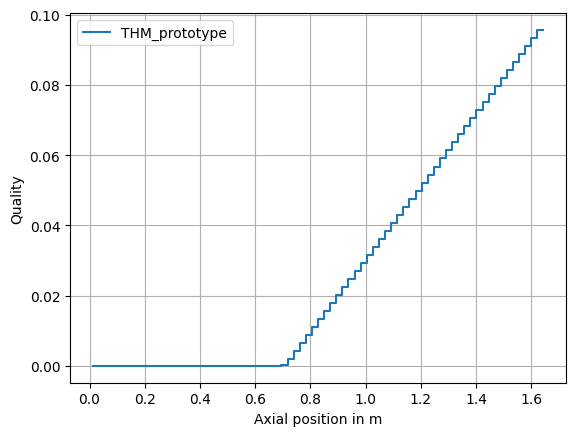

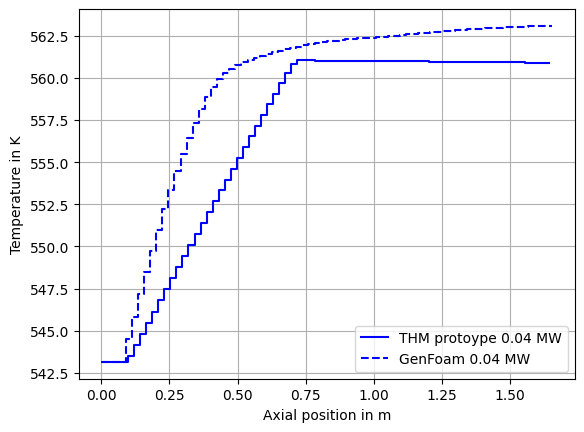

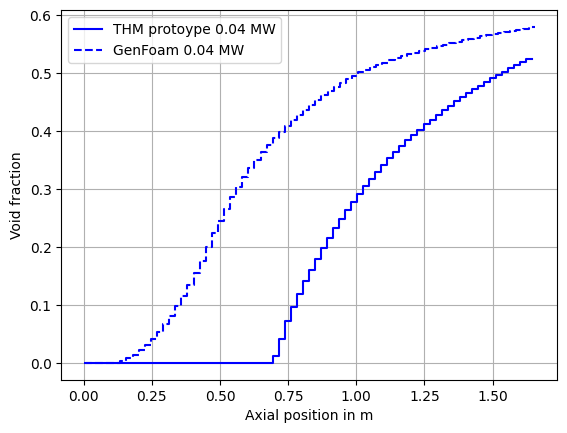

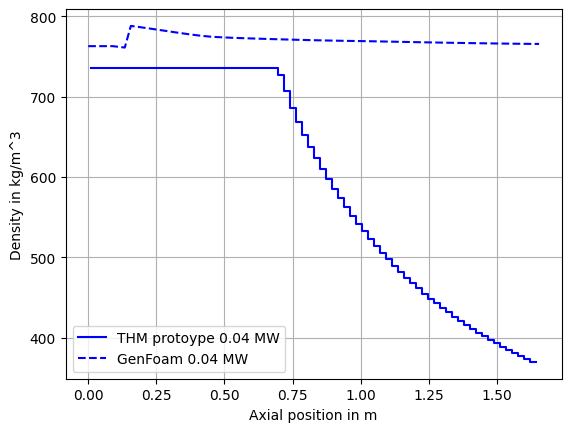

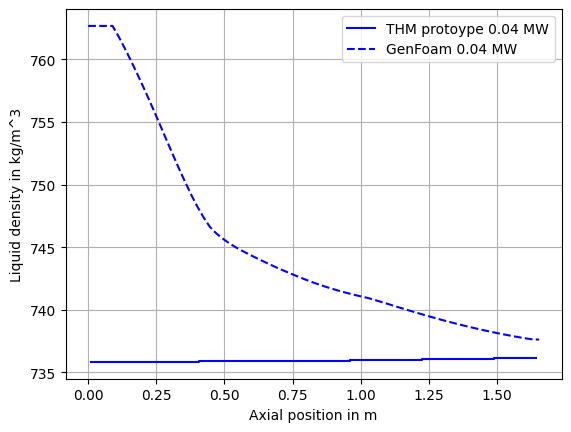

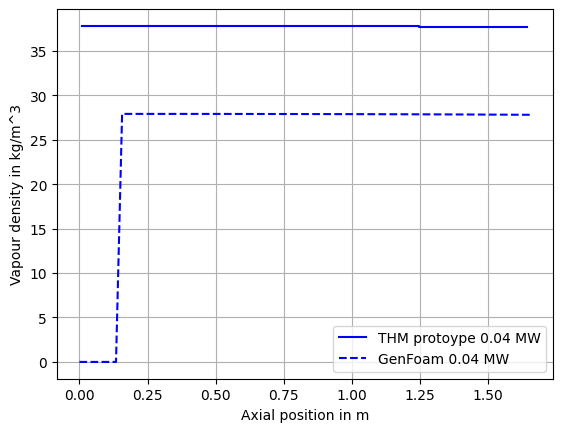

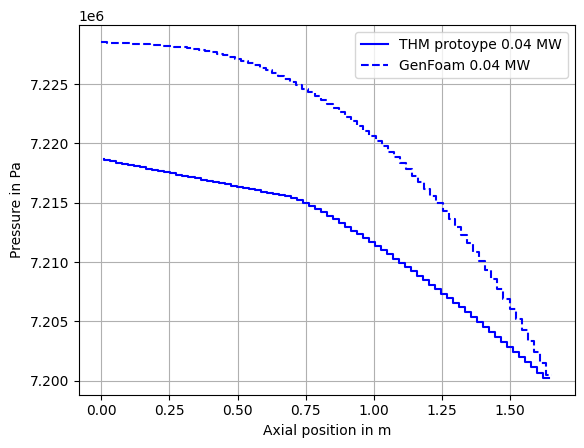

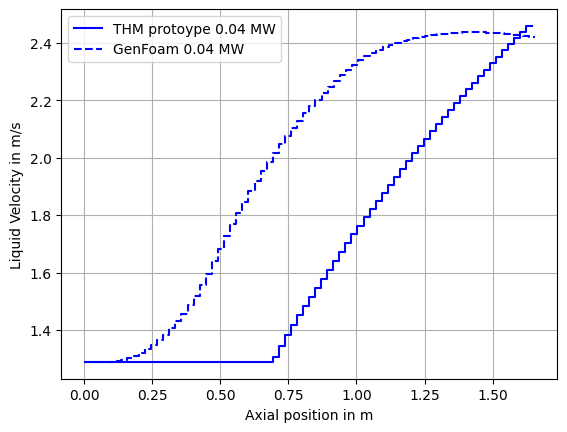

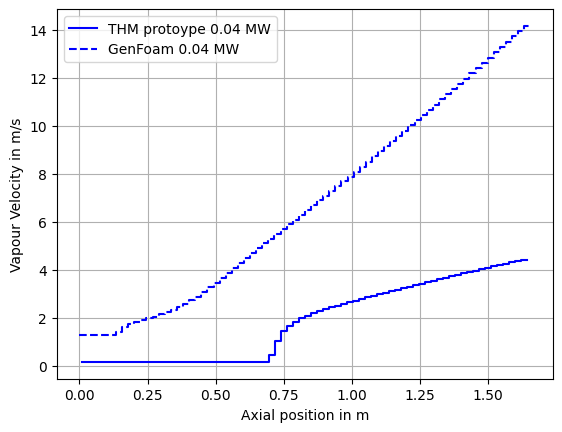

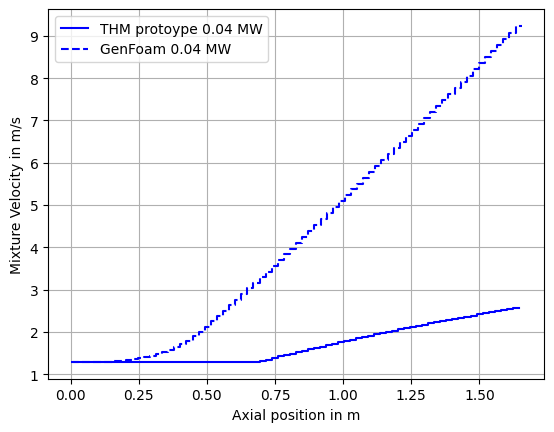

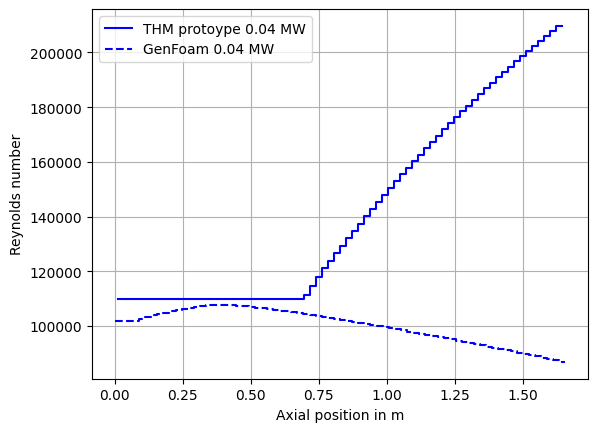

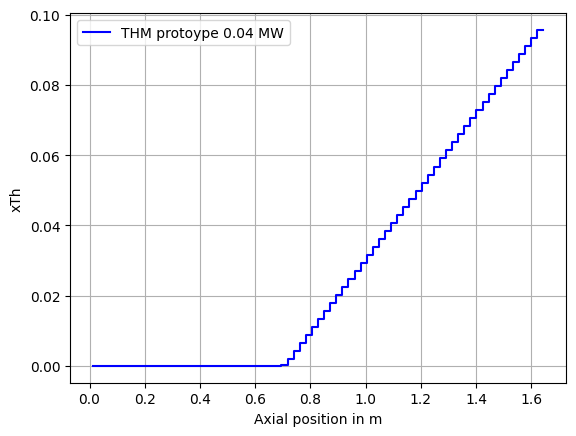

In [5]:
title1 = 400 * fuelRadius** 2 * np.pi * height #MW
title2 = 200 * fuelRadius** 2 * np.pi * height #MW
title3 = 100 * fuelRadius** 2 * np.pi * height #MW
plotter = GFPlotterComp(caseMerge, [rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\these\AT10_4', rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\these\AT10_2', rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\these\AT10_1'], "AT10_3power_oldHeight", [f"{title1:.2f} MW", f"{title2:.2f} MW", f"{title3:.2f} MW"])
plotter.plotComparison()

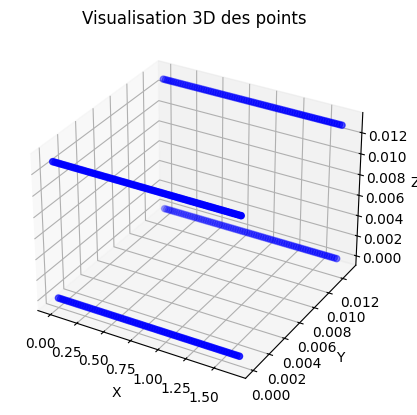

In [6]:
points = [
    (0, 0, 0), (0.02, 0, 0), (0.04, 0, 0), (0.06, 0, 0), (0.08, 0, 0), (0.1, 0, 0),
    (0, 0.01295, 0), (0.02, 0.01295, 0), (0.04, 0.01295, 0), (0.06, 0.01295, 0),
    (0.08, 0.01295, 0), (0.1, 0.01295, 0),
    (0, 0, 0.01295), (0.02, 0, 0.01295), (0.04, 0, 0.01295), (0.06, 0, 0.01295),
    (0.08, 0, 0.01295), (0.1, 0, 0.01295),
    (0, 0.01295, 0.01295), (0.02, 0.01295, 0.01295), (0.04, 0.01295, 0.01295),
    (0.06, 0.01295, 0.01295), (0.08, 0.01295, 0.01295), (0.1, 0.01295, 0.01295),
    (0.1222142857, 0, 0), (0.1444285714, 0, 0), (0.1666428571, 0, 0),
    (0.1888571429, 0, 0), (0.2110714286, 0, 0), (0.2332857143, 0, 0),
    (0.2555, 0, 0), (0.2777142857, 0, 0), (0.2999285714, 0, 0),
    (0.3221428571, 0, 0), (0.3443571429, 0, 0), (0.3665714286, 0, 0),
    (0.3887857143, 0, 0), (0.411, 0, 0), (0.4332142857, 0, 0),
    (0.4554285714, 0, 0), (0.4776428571, 0, 0), (0.4998571429, 0, 0),
    (0.5220714286, 0, 0), (0.5442857143, 0, 0), (0.5665, 0, 0),
    (0.5887142857, 0, 0), (0.6109285714, 0, 0), (0.6331428571, 0, 0),
    (0.6553571429, 0, 0), (0.6775714286, 0, 0), (0.6997857143, 0, 0),
    (0.722, 0, 0), (0.7442142857, 0, 0), (0.7664285714, 0, 0),
    (0.7886428571, 0, 0), (0.8108571429, 0, 0), (0.8330714286, 0, 0),
    (0.8552857143, 0, 0), (0.8775, 0, 0), (0.8997142857, 0, 0),
    (0.9219285714, 0, 0), (0.9441428571, 0, 0), (0.9663571429, 0, 0),
    (0.9885714286, 0, 0), (1.010785714, 0, 0), (1.033, 0, 0),
    (1.055214286, 0, 0), (1.077428571, 0, 0), (1.099642857, 0, 0),
    (1.121857143, 0, 0), (1.144071429, 0, 0), (1.166285714, 0, 0),
    (1.1885, 0, 0), (1.210714286, 0, 0), (1.232928571, 0, 0),
    (1.255142857, 0, 0), (1.277357143, 0, 0), (1.299571429, 0, 0),
    (1.321785714, 0, 0), (1.344, 0, 0), (1.366214286, 0, 0),
    (1.388428571, 0, 0), (1.410642857, 0, 0), (1.432857143, 0, 0),
    (1.455071429, 0, 0), (1.477285714, 0, 0), (1.4995, 0, 0),
    (1.521714286, 0, 0), (1.543928571, 0, 0), (1.566142857, 0, 0),
    (1.588357143, 0, 0), (1.610571429, 0, 0), (1.632785714, 0, 0),
    (1.655, 0, 0), (0.1222142857, 0.01295, 0), (0.1444285714, 0.01295, 0),
    (0.1666428571, 0.01295, 0), (0.1888571429, 0.01295, 0),
    (0.2110714286, 0.01295, 0), (0.2332857143, 0.01295, 0),
    (0.2555, 0.01295, 0), (0.2777142857, 0.01295, 0),
    (0.2999285714, 0.01295, 0), (0.3221428571, 0.01295, 0),
    (0.3443571429, 0.01295, 0), (0.3665714286, 0.01295, 0),
    (0.3887857143, 0.01295, 0), (0.411, 0.01295, 0),
    (0.4332142857, 0.01295, 0), (0.4554285714, 0.01295, 0),
    (0.4776428571, 0.01295, 0), (0.4998571429, 0.01295, 0),
    (0.5220714286, 0.01295, 0), (0.5442857143, 0.01295, 0),
    (0.5665, 0.01295, 0), (0.5887142857, 0.01295, 0),
    (0.6109285714, 0.01295, 0), (0.6331428571, 0.01295, 0),
    (0.6553571429, 0.01295, 0), (0.6775714286, 0.01295, 0),
    (0.6997857143, 0.01295, 0), (0.722, 0.01295, 0),
    (0.7442142857, 0.01295, 0), (0.7664285714, 0.01295, 0),
    (0.7886428571, 0.01295, 0), (0.8108571429, 0.01295, 0),
    (0.8330714286, 0.01295, 0), (0.8552857143, 0.01295, 0),
    (0.8775, 0.01295, 0), (0.8997142857, 0.01295, 0),
    (0.9219285714, 0.01295, 0), (0.9441428571, 0.01295, 0),
    (0.9663571429, 0.01295, 0), (0.9885714286, 0.01295, 0),
    (1.010785714, 0.01295, 0), (1.033, 0.01295, 0),
    (1.055214286, 0.01295, 0),    (1.077428571, 0.01295, 0), (1.099642857, 0.01295, 0),
    (1.121857143, 0.01295, 0), (1.144071429, 0.01295, 0),
    (1.166285714, 0.01295, 0), (1.1885, 0.01295, 0),
    (1.210714286, 0.01295, 0), (1.232928571, 0.01295, 0),
    (1.255142857, 0.01295, 0), (1.277357143, 0.01295, 0),
    (1.299571429, 0.01295, 0), (1.321785714, 0.01295, 0),
    (1.344, 0.01295, 0), (1.366214286, 0.01295, 0),
    (1.388428571, 0.01295, 0), (1.410642857, 0.01295, 0),
    (1.432857143, 0.01295, 0), (1.455071429, 0.01295, 0),
    (1.477285714, 0.01295, 0), (1.4995, 0.01295, 0),
    (1.521714286, 0.01295, 0), (1.543928571, 0.01295, 0),
    (1.566142857, 0.01295, 0), (1.588357143, 0.01295, 0),
    (1.610571429, 0.01295, 0), (1.632785714, 0.01295, 0),
    (1.655, 0.01295, 0),
    (0.1222142857, 0, 0.01295), (0.1444285714, 0, 0.01295),
    (0.1666428571, 0, 0.01295), (0.1888571429, 0, 0.01295),
    (0.2110714286, 0, 0.01295), (0.2332857143, 0, 0.01295),
    (0.2555, 0, 0.01295), (0.2777142857, 0, 0.01295),
    (0.2999285714, 0, 0.01295), (0.3221428571, 0, 0.01295),
    (0.3443571429, 0, 0.01295), (0.3665714286, 0, 0.01295),
    (0.3887857143, 0, 0.01295), (0.411, 0, 0.01295),
    (0.4332142857, 0, 0.01295), (0.4554285714, 0, 0.01295),
    (0.4776428571, 0, 0.01295), (0.4998571429, 0, 0.01295),
    (0.5220714286, 0, 0.01295), (0.5442857143, 0, 0.01295),
    (0.5665, 0, 0.01295), (0.5887142857, 0, 0.01295),
    (0.6109285714, 0, 0.01295), (0.6331428571, 0, 0.01295),
    (0.6553571429, 0, 0.01295), (0.6775714286, 0, 0.01295),
    (0.6997857143, 0, 0.01295), (0.722, 0, 0.01295),
    (0.7442142857, 0, 0.01295), (0.7664285714, 0, 0.01295),
    (0.7886428571, 0, 0.01295), (0.8108571429, 0, 0.01295),
    (0.8330714286, 0, 0.01295), (0.8552857143, 0, 0.01295),
    (0.8775, 0, 0.01295), (0.8997142857, 0, 0.01295),
    (0.9219285714, 0, 0.01295), (0.9441428571, 0, 0.01295),
    (0.9663571429, 0, 0.01295), (0.9885714286, 0, 0.01295),
    (1.010785714, 0, 0.01295), (1.033, 0, 0.01295),
    (1.055214286, 0, 0.01295), (1.077428571, 0, 0.01295),
    (1.099642857, 0, 0.01295), (1.121857143, 0, 0.01295),
    (1.144071429, 0, 0.01295), (1.166285714, 0, 0.01295),
    (1.1885, 0, 0.01295), (1.210714286, 0, 0.01295),
    (1.232928571, 0, 0.01295), (1.255142857, 0, 0.01295),
    (1.277357143, 0, 0.01295), (1.299571429, 0, 0.01295),
    (1.321785714, 0, 0.01295), (1.344, 0, 0.01295),
    (1.366214286, 0, 0.01295), (1.388428571, 0, 0.01295),
    (1.410642857, 0, 0.01295), (1.432857143, 0, 0.01295),
    (1.455071429, 0, 0.01295), (1.477285714, 0, 0.01295),
    (1.4995, 0, 0.01295), (1.521714286, 0, 0.01295),
    (1.543928571, 0, 0.01295), (1.566142857, 0, 0.01295),
    (1.588357143, 0, 0.01295), (1.610571429, 0, 0.01295),
    (1.632785714, 0, 0.01295), (1.655, 0, 0.01295),
    (0.1222142857, 0.01295, 0.01295), (0.1444285714, 0.01295, 0.01295),
    (0.1666428571, 0.01295, 0.01295), (0.1888571429, 0.01295, 0.01295),
    (0.2110714286, 0.01295, 0.01295), (0.2332857143, 0.01295, 0.01295),
    (0.2555, 0.01295, 0.01295), (0.2777142857, 0.01295, 0.01295),
    (0.2999285714, 0.01295, 0.01295), (0.3221428571, 0.01295, 0.01295),
    (0.3443571429, 0.01295, 0.01295), (0.3665714286, 0.01295, 0.01295),
    (0.3887857143, 0.01295, 0.01295), (0.411, 0.01295, 0.01295),
    (0.4332142857, 0.01295, 0.01295), (0.4554285714, 0.01295, 0.01295),
    (0.4776428571, 0.01295, 0.01295), (0.4998571429, 0.01295, 0.01295),
    (0.5220714286, 0.01295, 0.01295), (0.5442857143, 0.01295, 0.01295),
    (0.5665, 0.01295, 0.01295),     (0.5887142857, 0.01295, 0.01295), (0.6109285714, 0.01295, 0.01295),
    (0.6331428571, 0.01295, 0.01295), (0.6553571429, 0.01295, 0.01295),
    (0.6775714286, 0.01295, 0.01295), (0.6997857143, 0.01295, 0.01295),
    (0.722, 0.01295, 0.01295), (0.7442142857, 0.01295, 0.01295),
    (0.7664285714, 0.01295, 0.01295), (0.7886428571, 0.01295, 0.01295),
    (0.8108571429, 0.01295, 0.01295), (0.8330714286, 0.01295, 0.01295),
    (0.8552857143, 0.01295, 0.01295), (0.8775, 0.01295, 0.01295),
    (0.8997142857, 0.01295, 0.01295), (0.9219285714, 0.01295, 0.01295),
    (0.9441428571, 0.01295, 0.01295), (0.9663571429, 0.01295, 0.01295),
    (0.9885714286, 0.01295, 0.01295), (1.010785714, 0.01295, 0.01295),
    (1.033, 0.01295, 0.01295), (1.055214286, 0.01295, 0.01295),
    (1.077428571, 0.01295, 0.01295), (1.099642857, 0.01295, 0.01295),
    (1.121857143, 0.01295, 0.01295), (1.144071429, 0.01295, 0.01295),
    (1.166285714, 0.01295, 0.01295), (1.1885, 0.01295, 0.01295),
    (1.210714286, 0.01295, 0.01295), (1.232928571, 0.01295, 0.01295),
    (1.255142857, 0.01295, 0.01295), (1.277357143, 0.01295, 0.01295),
    (1.299571429, 0.01295, 0.01295), (1.321785714, 0.01295, 0.01295),
    (1.344, 0.01295, 0.01295), (1.366214286, 0.01295, 0.01295),
    (1.388428571, 0.01295, 0.01295), (1.410642857, 0.01295, 0.01295),
    (1.432857143, 0.01295, 0.01295), (1.455071429, 0.01295, 0.01295),
    (1.477285714, 0.01295, 0.01295), (1.4995, 0.01295, 0.01295),
    (1.521714286, 0.01295, 0.01295), (1.543928571, 0.01295, 0.01295),
    (1.566142857, 0.01295, 0.01295), (1.588357143, 0.01295, 0.01295),
    (1.610571429, 0.01295, 0.01295), (1.632785714, 0.01295, 0.01295),
    (1.655, 0.01295, 0.01295)
]
# Séparer les coordonnées x, y et z
x_coords, y_coords, z_coords = zip(*points)

# Création de la figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Ajouter les points dans le graphique
ax.scatter(x_coords, y_coords, z_coords, c='b', marker='o')

# Labels des axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Titre
plt.title('Visualisation 3D des points')

# Afficher le graphique
plt.show()